In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('../testdata/grids.csv')

/var/folders/bk/xk1_stdx6096p4_57slyjzgw0000gn/T/ipykernel_29836/586208353.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Class_str = df.Class.astype(str)


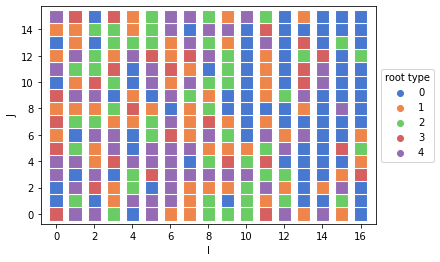

In [7]:
# missing data definitely looks clustered, but what about the other classes? hard to visually tell
import seaborn as sns
df.Class_str = df.Class.astype(str)
sns.set_palette("muted")
g= sns.scatterplot(x=df.I, y=df.J, hue=df.Class_str, s=180, marker='s',
                   hue_order=['0', '1', '2', '3', '4'])
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='root type')

In [8]:
def get_adj(i, j, grid):
    positions = []
    for adj_i in range(max(i-1, 0), min(i+2, grid.shape[0])):
        for adj_j in range(max(j-1, 0), min(j+2, grid.shape[1])):
            if adj_i != i or adj_j !=j:
                positions.append((adj_i, adj_j))
    return positions

transition_matrix = np.zeros((5, 5))
# grid_arr = grid_arr.astype(int)
from cactice.fileio import read_grids_csv
grid_arr = read_grids_csv('../testdata/grids.csv')['4']
# loop over spaces not on the edge
for i in range(1, 16):
    for j in range(1, 15):
        adjacent = get_adj(i, j, grid_arr)
        for adj in adjacent:
            transition_matrix[(grid_arr[i, j]), (grid_arr[adj])] += 1

In [9]:
# only counting points not on edge
# can adjust this to use edge points but the math becomes a little messier
class_counts = np.unique(grid_arr[1:-1, 1:-1], return_counts=True)[1]
# for each row, what is the average observed number of neighbors of each type?
avg_neighbor_counts = transition_matrix / class_counts[:,None]
avg_neighbor_counts

array([[3.06451613, 1.56451613, 1.24193548, 0.67741935, 1.4516129 ],
       [2.13953488, 1.44186047, 1.79069767, 0.81395349, 1.81395349],
       [1.9       , 2.05      , 1.6       , 0.95      , 1.5       ],
       [2.10526316, 1.57894737, 1.68421053, 0.63157895, 2.        ],
       [1.97826087, 1.76086957, 1.23913043, 0.86956522, 2.15217391]])

In [10]:
exp_neighbor_counts = np.tile(8 * class_counts / class_counts.sum(), reps=5)
exp_neighbor_counts

array([2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095])

In [11]:
exp_neighbor_counts.flatten()

array([2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095,
       2.36190476, 1.63809524, 1.52380952, 0.72380952, 1.75238095])

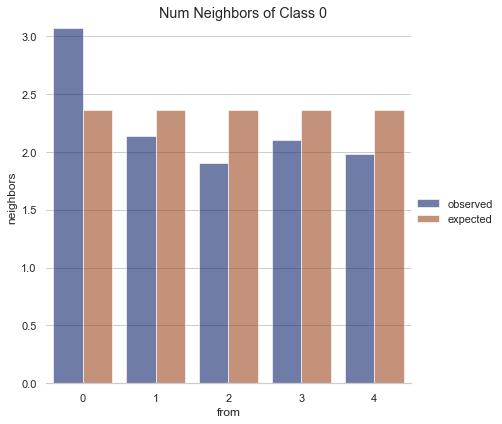

In [12]:
data = pd.DataFrame({
    'type': ['observed']* 25 + ['expected']*25,
    'to': [0, 1, 2, 3, 4]*5 + [0, 1, 2, 3, 4]*5,
    'from': [0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5 + [0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5,
    'neighbors': list(avg_neighbor_counts.flatten())+ list(exp_neighbor_counts.flatten())
}
)

import seaborn as sns
sns.set_theme(style="whitegrid")
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data[data.to==0], kind="bar",
    x="from", y='neighbors', hue="type", ci=None,
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.figure.suptitle('Num Neighbors of Class 0')
g.set_axis_labels("from", "neighbors")
g.legend.set_title("")

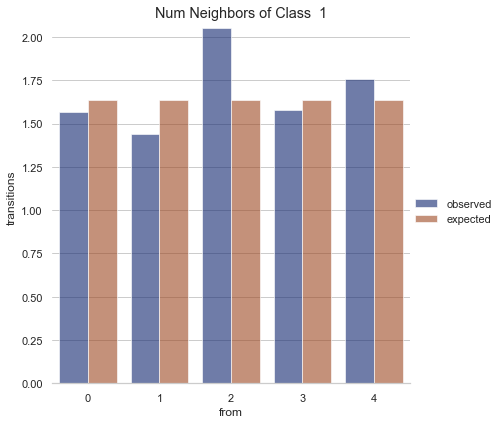

In [13]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data[data.to==1], kind="bar",
    x="from", y="neighbors", hue="type", ci=None,
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.figure.suptitle('Num Neighbors of Class  1')
g.set_axis_labels("from", "transitions")
g.legend.set_title("")

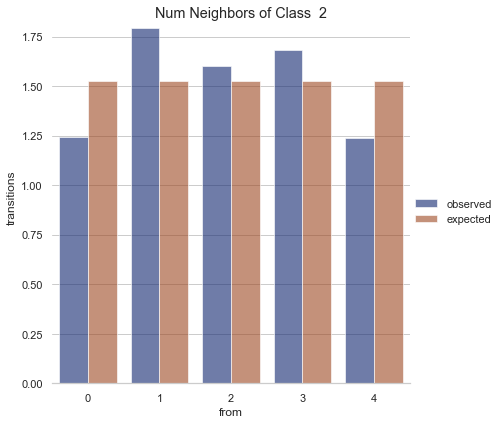

In [14]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data[data.to==2], kind="bar",
    x="from", y="neighbors", hue="type", ci=None,
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.figure.suptitle('Num Neighbors of Class  2')
g.set_axis_labels("from", "transitions")
g.legend.set_title("")

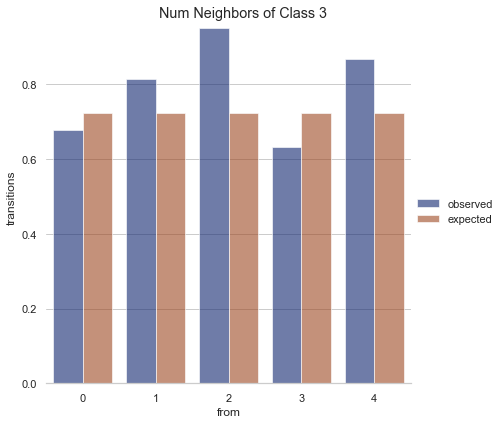

In [15]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data[data.to==3], kind="bar",
    x="from", y="neighbors", hue="type", ci=None,
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.figure.suptitle('Num Neighbors of Class 3')
g.set_axis_labels("from", "transitions")
g.legend.set_title("")

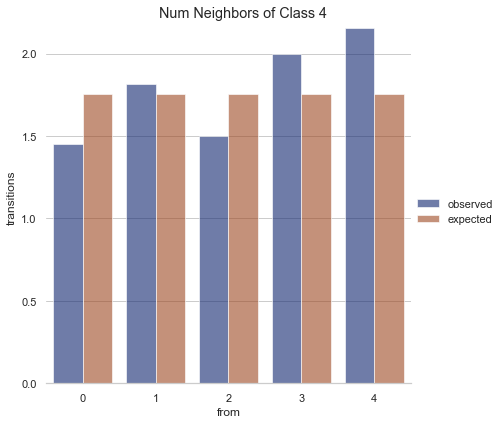

In [16]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data[data.to==4], kind="bar",
    x="from", y="neighbors", hue="type", ci=None,
    palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.figure.suptitle('Num Neighbors of Class 4')
g.set_axis_labels("from", "transitions")
g.legend.set_title("")

In [17]:
# chi2
# use transition matrix here so that num of observations factors into test
from scipy.stats import chisquare

In [18]:
# Using all data (including missing)

# overall probability of class 
class_prob = class_counts / (grid_arr[1:-1, 1:-1].shape[0] * grid_arr[1:-1, 1:-1].shape[1])
# expected number transitions between classes
exp_transition_matrix = 14*15*8* class_prob[:, None] @ class_prob[None, :]
print(chisquare(transition_matrix.flatten(), exp_transition_matrix.flatten()))

Power_divergenceResult(statistic=49.52941030646436, pvalue=0.0016245603895943305)


In [19]:
# overall probability of class excluding 0
num_filled = grid_arr[1:-1, 1:-1].shape[0] * grid_arr[1:-1, 1:-1].shape[1] - class_counts[0]
class_prob_no_missing = class_counts[1:] / (num_filled)
# scale by total number of non-0 numbers that exist
exp_no_missing = transition_matrix[1:, 1:].sum() * class_prob_no_missing[:, None] @ class_prob_no_missing[None, :]

In [20]:
# Excluding missing
print(chisquare(transition_matrix[1:, 1:].flatten(), exp_no_missing.flatten()))

Power_divergenceResult(statistic=17.701961630273445, pvalue=0.27865832698712806)
